# Project Three Notebook

For my project, I was interested in looking at the correlation between the college a student attended and the likelihood of them receiving a scholarship.  I found the data on Data.gov authored by the New York State Higher Education Services Corporation.  The data provides information on the name of the NY college, the sector group to which that college belongs, the amount of recipients of a scholarship, their full-time equivelance, and the total amount of funding that school received from scholarships all dating back to 2009.  

## Process & Development

In the beginning on the project, it was clear that in order to look at the correlation between college a student attended and the likelihood of them receiving a scholarship, the data related to college would need to be numerical in some way as the program was not function with text.  In order to address that, I decided to find the correlation between sector groups (grouping of colleges) and likelihood of a scholarship as the different sectino groups were associated with a number.

I attemped to look into the panda documentation on their website to find a search & replace function to identify all instances of a sector group and replace it with their corresponding number.  For example, I waI nted to change all "1-CUNY CC" to just simply "1".  With that change, the data would keep the same information but would now be funcation with the programing.  Afte unfortunately not being able to get the syntax to work for the function I found in the pandas library, I manually made the change.  Later in the project, I realized the the logical tests used in the example to simplify income, can also be used as a find & replace function.  I undid the changes I made manual to the csv document and instead used code to select each of the 9 college sector groups and replace them with a singular number.  To further clean up the data, I deleted several columns that I did not want to address in the statistical analysis and renamed them for simplicity sake.  Finally, I ran the function to ensure the data was in fact number and to remove any entries that werent.  


Next, I defind two sets of data: one with the independent variable as Groups and the other with the independent variable as College.  The objective was to see which of the two was more accurate in predicting whether or not a student would have a scholarship.  Finally, I ran linear regressions on both of them to produce R-Squared and Accuracy values.  For the data set labeled "Group_df", the R-Squared and Accuracy values were 0.117 and 0.11 respectively.  What this means, is that the model accounts for only 11.7% of the variance in the data and is correct in its prediction only 11% of the time. In running the second data set labeled "College_df", there were slight but interesting changes in the R-Squared and Accuracy values.  For the R-Squared value, the new data set accounted for 13.7% of the variance in the data a small inmp

In [292]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [293]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('scholarships.csv', parse_dates=[0]) 
raw_data_df.head()

,Academic Year,TAP College Code,Federal School Code,TAP College Name,TAP Sector Group,Scholarship Headcount,Scholarship FTE,Scholarship Dollars
0,2016-01-01,1410,2687,CUNY BROOKLYN COLLEGE,1-CUNY SR,288,234.33,306098.35
1,2016-01-01,875,2838,SUNY STONY BROOK,3-SUNY SO,1139,1047.00,2278194.14
2,2016-01-01,1402,2694,CUNY KINGSBOROUGH CC,2-CUNY CC,32,22.50,59932.25
3,2016-01-01,5083,2735,HILBERT COLLEGE,5-INDEPENDENT,1,0.50,225.00
4,2016-01-01,140,2705,COLLEGE OF SAINT ROSE,5-INDEPENDENT,68,64.50,108317.00


In [294]:
# for multiple columns
processed_data_df = raw_data_df.drop([
                                            'Federal School Code',
                                            'TAP College Name',
                                            'Academic Year',
                                           ], 1)
processed_data_df.head()

,TAP College Code,TAP Sector Group,Scholarship Headcount,Scholarship FTE,Scholarship Dollars
0,1410,1-CUNY SR,288,234.33,306098.35
1,875,3-SUNY SO,1139,1047.00,2278194.14
2,1402,2-CUNY CC,32,22.50,59932.25
3,5083,5-INDEPENDENT,1,0.50,225.00
4,140,5-INDEPENDENT,68,64.50,108317.00


In [295]:
# You can rename columns like so.
processed_data_df = processed_data_df.rename(columns={ 
                                                        'TAP College Code': 'College',
                                                        'TAP Sector Group': 'Group',
                                                        'Scholarship Headcount': 'Headcount',
                                                        'Scholarship Dollars': 'Amount',
                                                        'Scholarship FTE': 'FTE',
                                                     })
processed_data_df.head()

,College,Group,Headcount,FTE,Amount
0,1410,1-CUNY SR,288,234.33,306098.35
1,875,3-SUNY SO,1139,1047.00,2278194.14
2,1402,2-CUNY CC,32,22.50,59932.25
3,5083,5-INDEPENDENT,1,0.50,225.00
4,140,5-INDEPENDENT,68,64.50,108317.00


In [296]:
processed_data_df.loc[processed_data_df['Group'] == '1-CUNY SR', 'Group'] = 1 
processed_data_df.loc[processed_data_df['Group'] == '2-CUNY CC', 'Group'] = 2
processed_data_df.loc[processed_data_df['Group'] == '3-SUNY SO', 'Group'] = 3 
processed_data_df.loc[processed_data_df['Group'] == '4-SUNY CC', 'Group'] = 4 
processed_data_df.loc[processed_data_df['Group'] == '5-INDEPENDENT', 'Group'] = 5 
processed_data_df.loc[processed_data_df['Group'] == '6-BUS. DEGREE', 'Group'] = 6 
processed_data_df.loc[processed_data_df['Group'] == '7-BUS. NON-DEG', 'Group'] = 7 
processed_data_df.loc[processed_data_df['Group'] == '8-OTHER', 'Group'] = 8 
processed_data_df.loc[processed_data_df['Group'] == 'VOCATIONAL - VET SCHOOLS ONLY', 'Group'] = 9

processed_data_df

,College,Group,Headcount,FTE,Amount
0,1410,1,288,234.33,306098.35
1,875,3,1139,1047.00,2278194.14
2,1402,2,32,22.50,59932.25
3,5083,5,1,0.50,225.00
4,140,5,68,64.50,108317.00
5,2321,6,4,2.00,6995.01
6,2042,4,41,34.67,65402.90
7,1040,5,54,51.25,180206.00
8,2265,5,2,2.00,17020.00
9,3015,3,9,7.00,51952.50


In [311]:
# To make sure all of your columns are stored as numbers, use the pd.to_numeric method like so.
processed_data_df = processed_data_df.apply(pd.to_numeric, errors='coerce')
# errors='coerce' will set things that can't be converted to numbers to NaN
# so you'll want to drop these like so.
processed_data_df = processed_data_df.dropna()
processed_data_df.head()

,College,Group,Headcount,FTE,Amount
0,1410,1,288,234.33,306098.35
1,875,3,1139,1047.00,2278194.14
2,1402,2,32,22.50,59932.25
3,5083,5,1,0.50,225.00
4,140,5,68,64.50,108317.00


In [298]:
Group_df = processed_data_df[[
                               'Group', 
                               'Headcount',
                                'FTE',
                               ]].copy()
Group_df.head()

,Group,Headcount,FTE
0,1,288,234.33
1,3,1139,1047.00
2,2,32,22.50
3,5,1,0.50
4,5,68,64.50


In [299]:
College_df = processed_data_df[[
                               'College', 
                               'Headcount',
                                'FTE',
                               ]].copy()
College_df.head()

,College,Headcount,FTE
0,1410,288,234.33
1,875,1139,1047.00
2,1402,32,22.50
3,5083,1,0.50
4,140,68,64.50


## Taining and Validation

Above I created four datasets worth exploring: 
- **`happy_lin_df`**. The data needed to access *happiness* along a continuous variable.
- **`sat_lin_df`**. The data needed to access *satisfaction* along a continuous variable.
- **`happy_class_df`**. The data needed to access *happiness* as a categorical variable.
- **`sat_class_df`**. The data needed to access *satisfaction* as a categorical variable.

Let's take them each in turn. 

## Group_df

In [313]:
data = Group_df

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

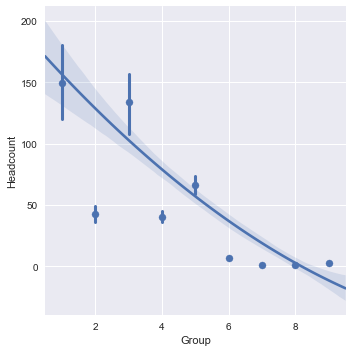

In [315]:
sns.lmplot(x="Group", y="Headcount", data=training, x_estimator=np.mean, order=2)

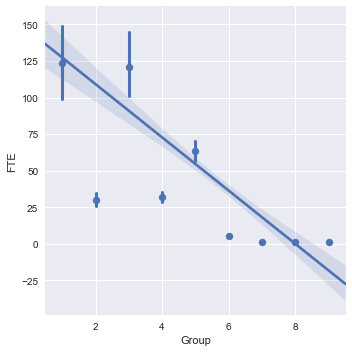

In [302]:
sns.lmplot(x="Group", y="FTE", data=training, x_estimator=np.mean, order=1)

In [303]:
model = ols("Group ~ Headcount + FTE", training).fit()
#model = ols("Group ~ Headcount + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Group   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           6.05e-64
Time:                        00:49:28   Log-Likelihood:                -4373.8
No. Observations:                2352   AIC:                             8754.
Df Residuals:                    2349   BIC:                             8771.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9002      0.036    136.001      0.000       4.830       4.971
Headcount     -0.0470      0.004    -12.983      0.000      -0.054      -0.040
FTE            0.0473      0.004     12.203      0.000       0.040       0.055
==============================================================================
Omnibus:                      198.594   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.420
Skew:                           0.480   Prob(JB):                    1.46e-111
Kurtosis:                       5.071   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("Group", axis=1).as_matrix(columns=None)
labels_train = training["Group"].as_matrix(columns=None)

features_test = holdout.drop("Group", axis=1).as_matrix(columns=None)
labels_test = holdout["Group"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.116565284408
Accuracy: 0.110225394689


## College_df

In [305]:
data = College_df

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

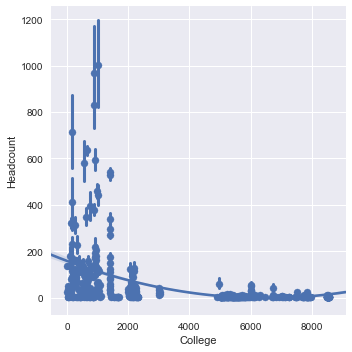

In [306]:
sns.lmplot(x="College", y="Headcount", data=training, x_estimator=np.mean, order=2)

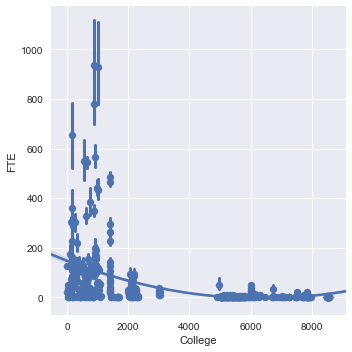

In [307]:
sns.lmplot(x="College", y="FTE", data=training, x_estimator=np.mean, order=2)

In [308]:
model = ols("College ~ Headcount + FTE", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                College   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           5.35e-76
Time:                        00:49:52   Log-Likelihood:                -21743.
No. Observations:                2352   AIC:                         4.349e+04
Df Residuals:                    2349   BIC:                         4.351e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3644.7466     58.081     62.753      0.000    3530.851    3758.642
Headcount     -2.4924      5.764     -0.432      0.665     -13.795       8.810
FTE           -4.9702      6.186     -0.803      0.422     -17.100       7.160
==============================================================================
Omnibus:                      727.093   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.775
Skew:                           0.488   Prob(JB):                     6.86e-44
Kurtosis:                       1.962   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
# Rerun with SciKitLearn because it's easy to check accuracy

features_train = training.drop("College", axis=1).as_matrix(columns=None)
labels_train = training["College"].as_matrix(columns=None)

features_test = holdout.drop("College", axis=1).as_matrix(columns=None)
labels_test = holdout["College"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.137196764527
Accuracy: 0.0943696143607
